In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('.cache/kagglehub/datasets/jagdishchakole1/mango-data/versions/1/Mango_leaf_disease1'):
    for filename in filenames:
        pass
        #print(os.path.join(dirname, filename))
print("hello")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

hello


In [2]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.applications.resnet import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

2025-03-09 18:53:21.988805: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741526602.000057   39970 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741526602.003357   39970 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-09 18:53:22.018809: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
# Load the model without the top (fully connected) layers
base_model =  ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

I0000 00:00:1741526603.426059   39970 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1236 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3070 Ti, pci bus id: 0000:01:00.0, compute capability: 8.6


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step


In [4]:
base_model.trainable = False

In [5]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout

# Flatten the output of the convolutional base
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)  # Add dropout to reduce overfitting
x = Dense(8, activation='softmax')(x)  # 8-class classification

# Create the new model
model = Model(inputs=base_model.input, outputs=x)


In [6]:
model.compile(
    optimizer='adam', 
    loss='categorical_crossentropy',  # Multi-class classification
    metrics=['accuracy']
)

In [7]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 49,280,136 (187.99 MB)

 Trainable params: 25,692,424 (98.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [8]:

print(f"Total layers in Resnet50: {len(model.layers)}")

Total layers in Resnet50: 179


In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define ImageDataGenerator (for rescaling)
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

# Load Training Data
train_generator = train_datagen.flow_from_directory(
    '.cache/kagglehub/datasets/jagdishchakole1/mango-data/versions/1/Mango_leaf_disease1/train',   # Path to train folder
    target_size=(224, 224), 
    batch_size=32,
    class_mode='categorical'  # Multi-class classification (8 classes)
)

# Load Validation Data
val_generator = val_datagen.flow_from_directory(
    '.cache/kagglehub/datasets/jagdishchakole1/mango-data/versions/1/Mango_leaf_disease1/val',   # Path to validation folder
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Load Test Data (For final evaluation)
test_generator = test_datagen.flow_from_directory(
    '.cache/kagglehub/datasets/jagdishchakole1/mango-data/versions/1/Mango_leaf_disease1/test',   # Path to test folder
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False   # No shuffling for test set
)


Found 2800 images belonging to 8 classes.
Found 800 images belonging to 8 classes.
Found 400 images belonging to 8 classes.


In [10]:
#Train the Model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1741526621.807561   40059 service.cc:148] XLA service 0x7f4ef80155a0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1741526621.807592   40059 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3070 Ti, Compute Capability 8.6
2025-03-09 18:53:41.919611: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1741526622.667973   40059 cuda_dnn.cc:529] Loaded cuDNN version 90300


 1/88 ━━━━━━━━━━━━━━━━━━━━ 12:13 8s/step - accuracy: 0.0938 - loss: 5.2403

I0000 00:00:1741526626.087859   40059 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


88/88 ━━━━━━━━━━━━━━━━━━━━ 19s 117ms/step - accuracy: 0.7463 - loss: 5.9580 - val_accuracy: 0.9862 - val_loss: 0.1108
Epoch 2/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - accuracy: 0.9492 - loss: 0.4507 - val_accuracy: 0.9887 - val_loss: 0.0421
Epoch 3/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - accuracy: 0.9656 - loss: 0.3197 - val_accuracy: 0.9962 - val_loss: 0.0236
Epoch 4/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - accuracy: 0.9607 - loss: 0.2440 - val_accuracy: 0.9937 - val_loss: 0.0477
Epoch 5/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.9631 - loss: 0.2940 - val_accuracy: 0.9950 - val_loss: 0.0440
Epoch 6/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - accuracy: 0.9732 - loss: 0.3481 - val_accuracy: 0.9912 - val_loss: 0.0864
Epoch 7/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.9703 - loss: 0.4433 - val_accuracy: 0.9962 - val_loss: 0.0374
Epoch 8/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - accuracy: 0.9720 - loss: 0.3354 - val_accuracy: 0.9912 - val_loss: 

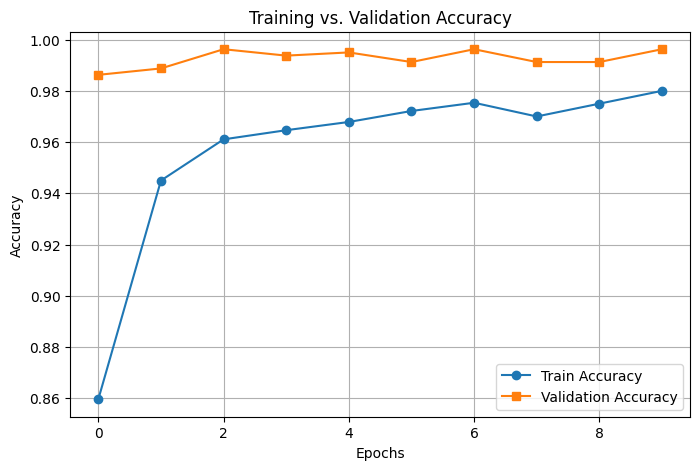

In [11]:
# Plot Training & Validation Accuracy
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='s')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs. Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [12]:
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test accuracy: {test_acc:.4f}")

13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 142ms/step - accuracy: 0.9940 - loss: 0.1317
Test accuracy: 0.9875
